In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

True


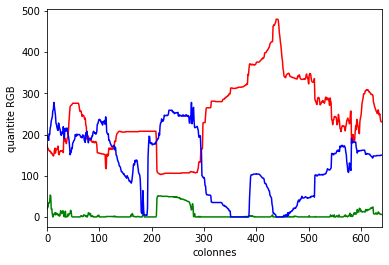

True


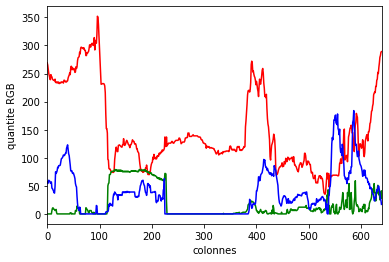

False


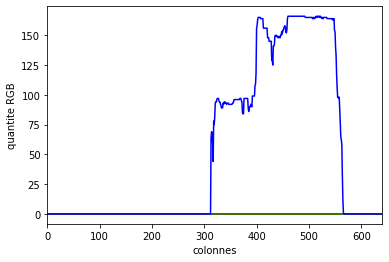

In [264]:
def get_min_col_from_max_g_and_b(array):
    result = np.zeros((array.shape[0] + 2,))
    result[1:-1] = array
    result2 = np.where(result == 0)[0]
    diff = result2[1:] - result2[:-1]
    return int(result[result2[np.argmax(diff)]+1]), np.max(diff)

def distance(data, ligne, colonne):
    ligne_c, colonne_c, _ = data.shape
    ligne_c = ligne_c // 2
    colonne_c = colonne_c // 2
    return ((ligne_c - ligne) ** 2 + (colonne_c - colonne) ** 2) ** (.5)

def detectBalise(image):
    data = np.asarray(image)
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 640])
    histograms = []

    for channel_id, c in zip(channel_ids, colors):
        if channel_id == 0:
            logical = (data[:, :, 0] > 30) & \
              (data[:, :, 1] < data[:, :, 0]) & \
               (data[:, :, 2] < data[:, :, 0])
        elif channel_id == 2:
            logical = (data[:, :, 2] > 30) & \
              (data[:, :, 1] < data[:, :, 2]) & \
               (data[:, :, 0] < data[:, :, 2])
        else:
            logical = (data[:, :, 1] > 30) & \
              (data[:, :, 0] < data[:, :, 1]) & \
               (data[:, :, 2] < data[:, :, 1])

        _, col = np.where(logical)
        histogram, bin_edges = np.histogram(
        col, bins=640, range=(0, 640)
        )
        histograms.append(histogram)
        plt.plot(bin_edges[:-1], histogram, color=c)

    histo_r, histo_g, histo_b = histograms

    r_and_g = np.where((histo_g[:] > 40) & (histo_b[:] > 50), 1, 0)
    more_r_than_blue = histo_r[:] > histo_b[:]
    r_and_g_col = np.where(r_and_g != 0)[0]

    t = r_and_g_col[1:] - r_and_g_col[:-1]
    r_and_g_col = np.where(t <= 10, r_and_g_col[1:], 0)

    col_min, length = get_min_col_from_max_g_and_b(r_and_g_col)
    balise = more_r_than_blue[col_min-length:col_min-1]

    if balise.size > 0:
        balise = np.all(balise)
    else:
        balise = False
    print(balise)

    plt.xlabel("colonnes")
    plt.ylabel("quantite RGB")

    plt.show()

# 3-uplet
# 0 - is balise on image capture ?
# 1 - is balise in front of robot ?
# 2 - if balise on image, however not in front say if it is on more on left (True) or more on right (False)
# 3 - pourcentage is how many the balise is from the center image.
detectBalise(Image.open("./capture_6.jpg"))
detectBalise(Image.open("./capture_8.jpg"))
detectBalise(Image.open("./B1.png"))